Author: **Vi-n1**

License: **MIT License**

# Importação das bibliotecas

In [1]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    f1_score,
    auc,
    roc_curve,
    recall_score,
    confusion_matrix,
    RocCurveDisplay,
    ConfusionMatrixDisplay,
)

# Importação da base de dados

Fonte do dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
df_credito = pd.read_csv('./base_dados/creditcard.csv')

# Informações sobre os dados

O conjunto de dados inclui transações feitas com cartões de crédito em setembro de 2013 por portadores de cartões europeus, com 492 fraudes em 284.807 transações. Contém variáveis numéricas resultantes de uma **transformação PCA**. As únicas características não transformadas são **Tempo** e **Valor**.

## Primeiros dados

In [3]:
df_credito.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Informações gerais

In [4]:
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Estatísticas descritivas

In [5]:
df_credito.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Número de valores ausentes em cada coluna

In [6]:
df_credito.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Análise das variáveis

O tempo não será determinante para a ocorrência ou não da fraude, a variável será excluída.

In [7]:
df_credito.drop(['Time'], inplace=True, axis=1)

A variável dependente é binária sendo 1 para fraude e 0 caso contrario.

In [8]:
df_credito['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
sns.set_theme(palette='dark')

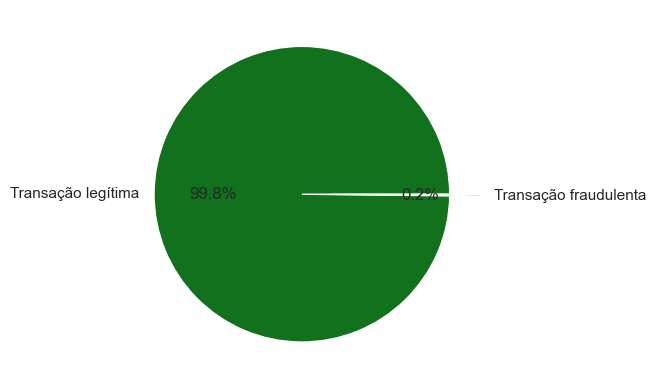

In [10]:
plt.pie(
    x=df_credito['Class'].value_counts(),
    autopct='%1.1f%%',
    labels=['Transação legítima', 'Transação fraudulenta'],
    colors=['g', 'r'],
    explode=(0, 0.2),
);

- Os dados são altamente desequilibrados, a maioria das transações são sem fraude.
- O desequilibrio afetará significativamente o desempenho dos modelos.

# Informações gráficas

## Mapa de calor da correlação dos dados

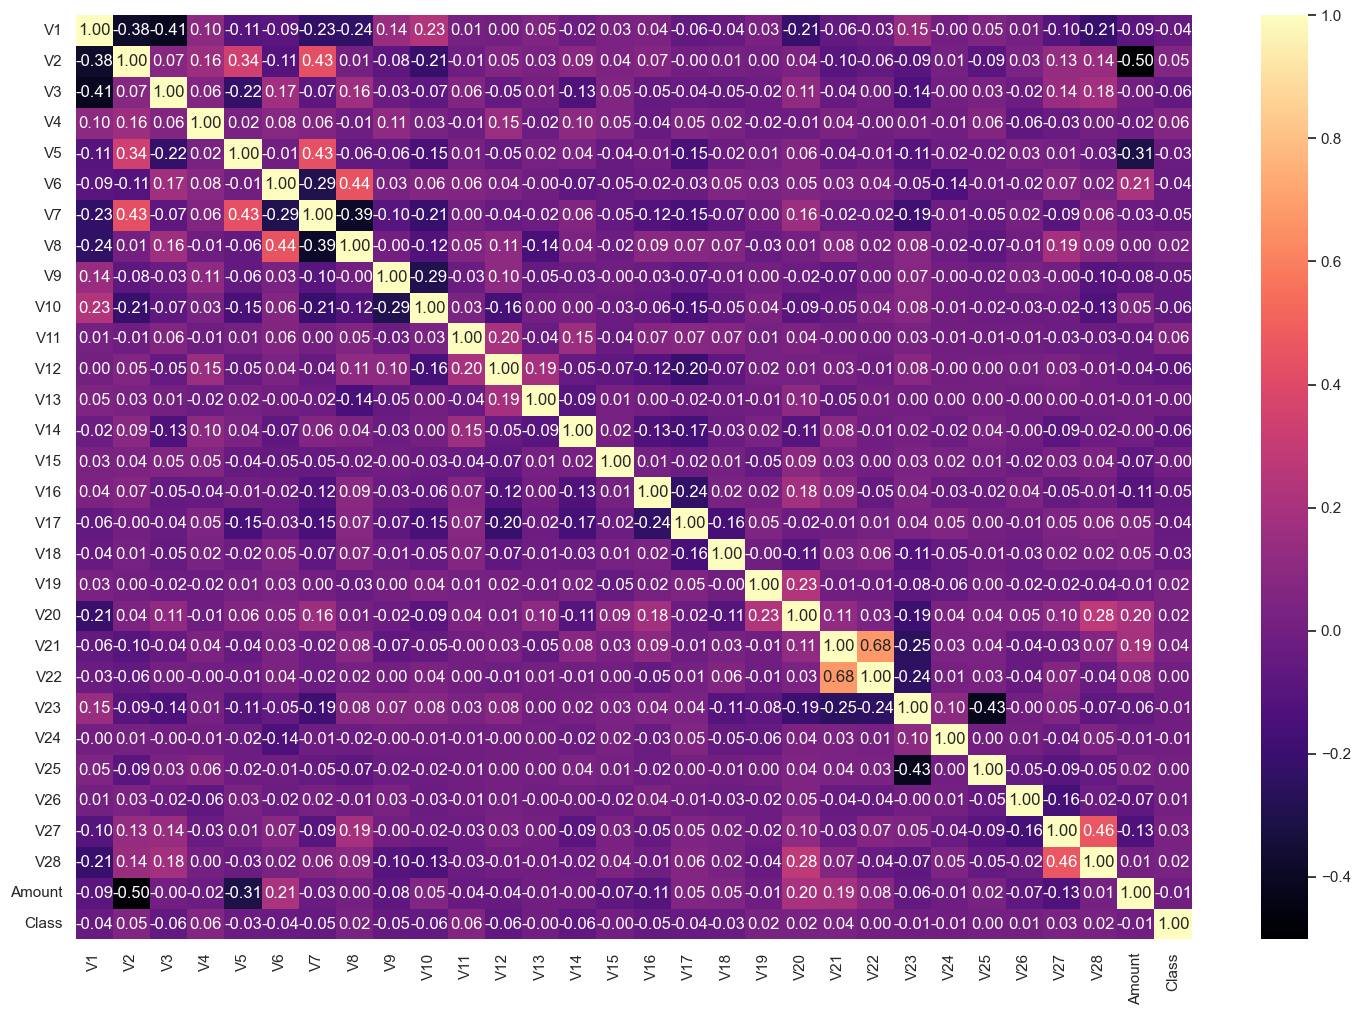

In [11]:
plt.figure(figsize=(18, 12))
sns.heatmap(df_credito.corr('spearman'), annot=True, cmap='magma', fmt='.2f');

## Distribuição dos valores das transações

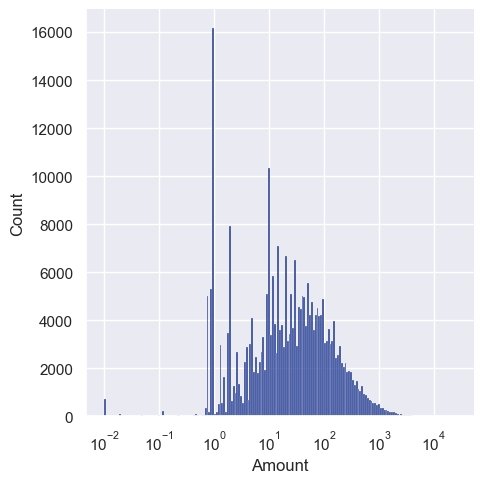

In [12]:
sns.displot(df_credito, x='Amount', log_scale=True);

# Aplicando a padronização

Para que os modelos não sofram com a diferença na escala de valores, é necessário aplicar uma padronização na variável independente **Amount**.

In [13]:
df_credito['Amount_padronizado'] = StandardScaler().fit_transform(
    df_credito['Amount'].values.reshape(-1, 1)
)

df_credito.drop('Amount', axis=1);

# Dividindo os dados em dados de testes e de treino

In [14]:
y = df_credito['Class'].values
X = df_credito.drop('Class', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=38
)

# Criação dos modelos

## Regressão logística

In [15]:
modelo_rl = LogisticRegression(max_iter=450, random_state=38)
modelo_rl.fit(X_train, y_train);

![](https://helloacm.com/wp-content/uploads/2016/03/logistic-regression-example.jpg)

Fonte: https://primo.ai/index.php?title=Logistic_Regression_%28LR%29

## Naive Bayes

In [16]:
modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train);

![](https://thatware.co/wp-content/uploads/2020/04/naive-bayes.png)

Fonte: https://thatware.co/naive-bayes

# Calculando as métricas

## Regressão logística

In [17]:
y_pred_rl = modelo_rl.predict(X_test)
y_pred_prob_rl = modelo_rl.predict_proba(X_test)
ac_rl = modelo_rl.score(X_test, y_test)
f1_rl = f1_score(y_test, y_pred_rl)
re_rl = recall_score(y_test, y_pred_rl)
cm_rl = confusion_matrix(y_test, y_pred_rl, labels=modelo_rl.classes_)

## Naive Bayes

In [18]:
y_pred_nb = modelo_nb.predict(X_test)
y_pred_prob_nb = modelo_nb.predict_proba(X_test)
ac_nb = modelo_nb.score(X_test, y_test)
f1_nb = f1_score(y_test, y_pred_nb)
re_nb = recall_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=modelo_nb.classes_)

# Resultado

## Curva ROC

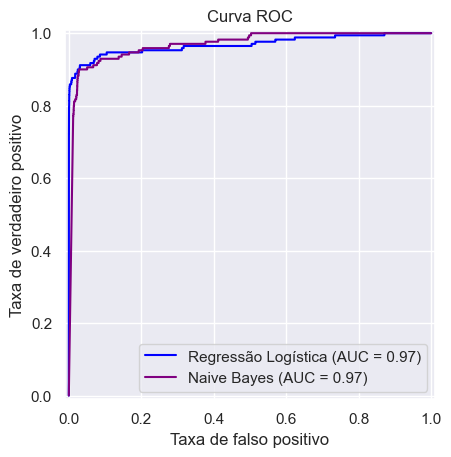

In [19]:
# Curva roc da regressão logística.
fpr_rl, tpr_rl, t_rl = roc_curve(y_test, y_pred_prob_rl[:, 1])
roc_auc_rl = auc(fpr_rl, tpr_rl)
rcd_rl = RocCurveDisplay(fpr=fpr_rl, tpr=tpr_rl, roc_auc=roc_auc_rl).plot(
    name='Regressão Logística', color='blue'
)

# Curva roc do Naive Bayes.
fpr_nb, tpr_nb, t_nb = roc_curve(y_test, y_pred_prob_nb[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)
display = RocCurveDisplay(fpr=fpr_nb, tpr=tpr_nb, roc_auc=roc_auc_nb).plot(
    ax=rcd_rl.ax_, name='Naive Bayes', color='purple'
)

display.ax_.set_title('Curva ROC')
display.ax_.set_xlabel('Taxa de falso positivo')
display.ax_.set_ylabel('Taxa de verdadeiro positivo');

## Matriz de confusão

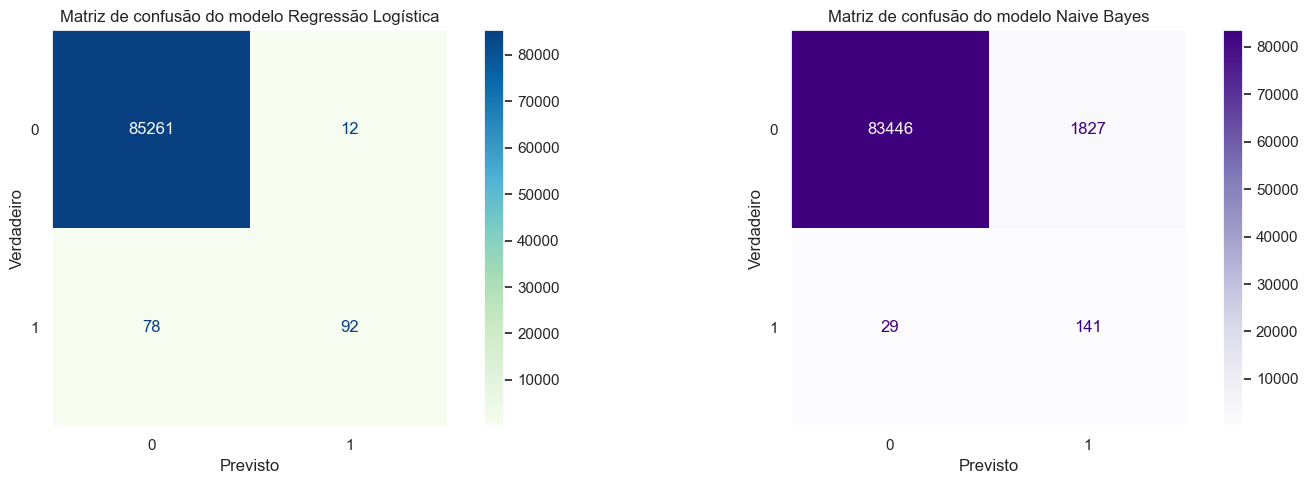

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

cmd_lr = ConfusionMatrixDisplay(
    confusion_matrix=cm_rl, display_labels=modelo_rl.classes_
).plot(ax=ax[0], cmap='GnBu')
cmd_lr.ax_.set_title('Matriz de confusão do modelo Regressão Logística')
cmd_lr.ax_.set(xlabel='Previsto', ylabel='Verdadeiro')
cmd_lr.ax_.grid(visible=False)

cmd_nb = ConfusionMatrixDisplay(
    confusion_matrix=cm_nb, display_labels=modelo_nb.classes_
).plot(ax=ax[1], cmap='Purples')
cmd_nb.ax_.set_title('Matriz de confusão do modelo Naive Bayes')
cmd_nb.ax_.set(xlabel='Previsto', ylabel='Verdadeiro')
cmd_nb.ax_.grid(visible=False)

plt.tight_layout();

## Comparando as métricas

In [21]:
r_modelo = pd.DataFrame(
    columns=[
        'Metrícas',
        'Performance Regressão Logística',
        'Performance Naive Bayes',
    ]
)
r_modelo['Metrícas'] = [
    'Accuracy',
    'f1 score',
    'Recall score',
    'ROC AUC',
    'Confusion matrix',
]
r_modelo['Performance Regressão Logística'] = [
    ac_rl,
    f1_rl,
    re_rl,
    roc_auc_rl,
    cm_rl,
]
r_modelo['Performance Naive Bayes'] = [ac_nb, f1_nb, re_nb, roc_auc_nb, cm_nb]
r_modelo

,Metrícas,Performance Regressão Logística,Performance Naive Bayes
0,Accuracy,0.998947,0.978278
1,f1 score,0.671533,0.131899
2,Recall score,0.541176,0.829412
3,ROC AUC,0.968711,0.96902
4,Confusion matrix,"[[85261, 12], [78, 92]]","[[83446, 1827], [29, 141]]"


# Conclusão

**Naive Bayes:**

- **Accuracy (Acurácia)**: Com um valor de 0.978278, indica que de forma geral o modelo está prevendo corretamente a classe majoritária.

- **F1 score**: O valor de 0.131899 é baixo, o que indica que o modelo não está bem na precisão e no recall para a classe minoritária.

- **Recall score**: Um valor de recall 0.829412 indica que o modelo é bom em identificar a classe positiva. No entanto, um recall alto com um F1 score baixo sugere que o modelo pode estar tendo muitos falsos positivos.

- **ROC AUC**: O valor de 0.96902 é alto, o que normalmente é um bom sinal de que o modelo distingue bem entre as classes.

- **Confusion matrix**: A matriz de confusão [[83446, 1827], [29, 141]] mostra que: o modelo previu corretamente 83.446 instâncias da classe negativa(transação não fraudulenta), mas teve 1.827 falsos positivos. Para a classe positiva(transação fraudulenta), ele identificou corretamente 141 instâncias, mas teve 29 falsos negativos.

    - **Verdadeiros Negativos (TN)**: 83.446
    - **Falsos Positivos (FP)**: 1.827
    - **Falsos Negativos (FN)**: 29
    - **Verdadeiros Positivos (TP)**: 141

**Regressão Logística Binária:**

- **Accuracy (Acurácia)**: Com um valor de 0.998947, indica uma alta taxa de previsões corretas em geral.

- **F1 Score**: O valor de 0.671533 sugere que o modelo tem um desempenho razoável em equilibrar a precisão e o recall.

- **Recall Score**: Um valor de 0.541176 indica que o modelo identifica corretamente 54.11% dos casos positivos reais, isso pode ser considerado baixo pois significa que quase a metade dos positivos reais estão sendo perdidos.

- **ROC AUC**: O valor de 0.968711 é muito bom, indicando que o modelo tem uma excelente capacidade de distinguir entre as classes positivas e negativas.

- **Confusion Matrix**: A matriz de confusão [[85261, 12], [78, 92]] mostra que: A matriz de confusão revela que o modelo é muito bom em prever a classe negativa(transação não fraudulenta), mas não tão bom em prever a classe positiva(transação fraudulenta), como também é refletido no valor de recall mais baixo.
    
    - **Verdadeiros Negativos (TN)**: 85261
    - **Falsos Positivos (FP)**: 12
    - **Falsos Negativos (FN)**: 78
    - **Verdadeiros Positivos (TP)**: 92


## Em resumo, os modelos são altamente precisos, mas estão sofrendo por causa de um desequilíbrio de classe que favorece a classe negativa, resultando em um recall mais baixo para a classe positiva.